# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

The analysis of the spectral properties of a signal plays an important role in digital signal processing. Some application examples are the

* [Spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer)
* Detection of (harmonic) signals
* [Estimation of fundamental frequency and harmonics](https://en.wikipedia.org/wiki/Modal_analysis)
* Spectral suppression: acoustic echo suppression, noise reduction, ...

In the practical realization of spectral analysis techniques the [discrete Fourier transformation](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) is applied to discrete finite-length signals in order to gain insights into their spectral composition. A basic task in spectral analysis is to determine the amplitude (and phase) of dominant harmonic contributions in a signal mixture. The properties of the DFT with respect to the analysis of an harmonic exponential signal are discussed in the following.

## The Leakage Effect

[Spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) is a fundamental effect of the DFT. It limits the ability to detect harmonic signals in signal mixtures and hence the performance of spectral analysis. In order to discuss this effect, first the DFT of a single harmonic exponential signal is regarded. Its spectrum is derived in four steps:

1. Fourier transform of an harmonic exponential signal,
2. discrete-time Fourier transform (DTFT) of a discrete harmonic exponential signal, and
3. DTFT of a finite-length discrete harmonic exponential signal
4. sampling of the DTFT

These steps are detailed in the remaining subsections.

### Fourier Transformation of an Exponential Signal

The harmonic exponential signal is defined as

\begin{equation}
x(t) = \mathrm{e}^{\,\mathrm{j}\, \omega_0 \, t}
\end{equation}

where $\omega_0 = 2 \pi f$ denotes the angular frequency of the signal. The Fourier transform of the exponential signal is

\begin{equation}
X(\mathrm{j}\, \omega) = \int\limits_{-\infty}^{\infty} x(t) \,\mathrm{e}^{\,- \mathrm{j}\, \omega \,t} \mathrm{d}t = 2\pi \; \delta(\omega - \omega_0)
\end{equation}

The spectrum consists of a single shifted Dirac impulse located at the angular frequency $\omega_0$ of the exponential signal. Hence the spectrum $X(\mathrm{j}\, \omega)$ consists of a clearly isolated and distinguishable event. In practice, it is not possible to compute the Fourier transformation of a continuous signal by means of digital signal processing.

### Discrete-Time Fourier Transformation of the Discrete Exponential Signal

Now lets consider sampled signals. The discrete exponential signal $x[k]$ is derived from its continuous counterpart $x(t)$ above by equidistant sampling $x[k] := x(k T)$ with the sampling interval $T$

\begin{equation}
x[k] = \mathrm{e}^{\,\mathrm{j}\, \Omega_0 \,k}
\end{equation}

where $\Omega_0 = \omega_0 T$ denotes the normalized angular frequency. The [discrete-time Fourier transform](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) is the Fourier transformation of a sampled signal. For the exponential signal it is given as

\begin{equation}
X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \sum_{k = -\infty}^{\infty} x[k]\, \mathrm{e}^{\,-\mathrm{j}\, \Omega \,k} = 2\pi \sum_{n = -\infty}^{\infty} \delta((\Omega-\Omega_0) - 2\,\pi\,n)
\end{equation}

The spectrum of the DTFT is $2\pi$-periodic due to sampling. As a consequence, the transformation of the discrete exponential signal consists of a series Dirac impulses. For the region of interest $-\pi < \Omega \leq \pi$ the spectrum consists of a clearly isolated and distinguishable event, as for the continuous case.

The DTFT cannot be realized in practice, since is requires the knowledge of the signal $x[k]$ for all time instants $k$. In general, a measured signal is only known within a finite time-interval. The DFT of a signal of finite length can be derived from the DTFT in two steps:

1. truncation (windowing) of the signal and
2. sampling of the DTFT spectrum of the windowed signal.

The consequences of these two steps are investigated in the following.

### Discrete-Time Fourier Transformation of a Truncated Discrete Exponential Signal

In general, truncation of a signal $x[k]$ to a length of $N$ samples is modeled by multiplying the signal with a window function $w[k]$ of length $N$

\begin{equation}
x_N[k] = x[k] \cdot w[k]
\end{equation}

where $x_N[k]$ denotes the truncated signal and $w[k] = 0$ for $\{k: k < 0 \wedge k \geq N \}$. The spectrum $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ can be derived from the multiplication theorem of the DTFT as

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast_N W(\mathrm{e}^{\,\mathrm{j}\, \Omega})
\end{equation}

where $\circledast$ denotes the cyclic/[circular convolution](https://en.wikipedia.org/wiki/Circular_convolution) of length $N$. A hard truncation of the signal to $N$ samples is modeled by the rectangular signal 

\begin{equation}
w[k] = \text{rect}_N[k] = \begin{cases}
1 & \mathrm{for} \; 0\leq k<N \\
0 & \mathrm{otherwise}
\end{cases}
\end{equation}

Its spectrum is given as

\begin{equation}
W(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \mathrm{e}^{\,-\mathrm{j} \, \Omega \,\frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,\Omega}{2})}{\sin(\frac{\Omega}{2})}
\end{equation}

The DTFT $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of the truncated exponential signal is derived by introducing the DTFT of the exponential signal and the window function, exploiting the properties of the Dirac impulse and the cyclic convolution as

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \mathrm{e}^{\,-\mathrm{j}\, (\Omega-\Omega_0) \, \frac{N-1}{2}} \cdot \frac{\sin(\frac{N\, (\Omega-\Omega_0)}{2})}{\sin(\frac{(\Omega-\Omega_0)}{2})}
\end{equation}

Clearly the DTFT of the truncated harmonic exponential signal $x_N[k]$ is not given by a series of Dirac impulses. Above equation is evaluated numerically in order to illustrate the properties of $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$.

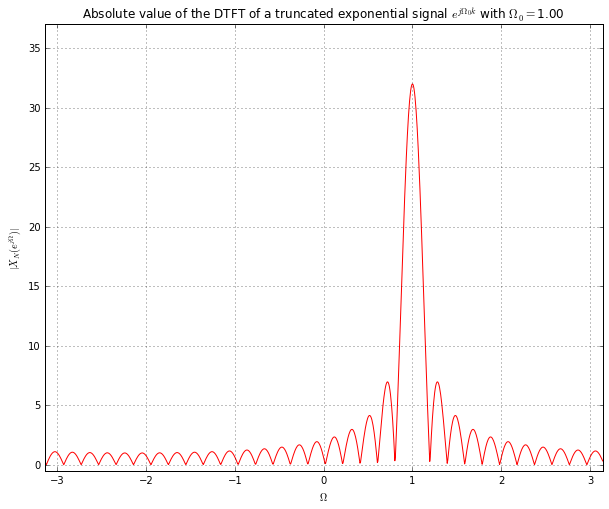

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Om0 = 1  # frequency of exponential signal
N = 32  # length of signal


# DTFT of finite length exponential signal (analytic)
Om = np.linspace(-np.pi, np.pi, num=1024)
XN = np.exp(-1j * (Om-Om0) * (N-1) / 2) * (np.sin(N * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))

# plot spectrum
plt.figure(figsize = (10, 8))
plt.plot(Om, abs(XN), 'r')
plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X_N(e^{j \Omega})|$')
plt.axis([-np.pi, np.pi, -0.5, N+5])
plt.grid()

**Excercise**

* Change the frequency `Om0` of the signal and rerun the example. How does the magnitude spectrum change?
* Change the length `N` of the signal and rerun the example. How does the magnitude spectrum change?

The maximum of the absolute value of the spectrum is located at the frequency $\Omega_0$. It should become clear that truncation of the exponential signal leads to a broadening of the spectrum. The shorter the signal, the wider the mainlobe becomes.

### The Leakage Effect of the Discrete Fourier Transformation

The DFT is derived from the DTFT $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of the truncated signal $x_N[k]$ by sampling the DTFT equidistantly at $\Omega = \mu \frac{2 \pi}{N}$

\begin{equation}
X[\mu] = X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})\big\vert_{\Omega = \mu \frac{2 \pi}{N}}
\end{equation}

For the DFT of the exponential signal we finally get

\begin{equation}
X[\mu] = \mathrm{e}^{\,\mathrm{j}\, (\Omega_0 - \mu \frac{2 \pi}{N}) \frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,(\Omega_0 - \mu \frac{2 \pi}{N})}{2})}{\sin(\frac{\Omega_0 - \mu \frac{2 \pi}{N}}{2})}
\end{equation}

The sampling of the DTFT is illustrated in the following example. Note that the normalized angular frequency $\Omega_0$ has been expressed in terms of the periodicity $P$ of the exponential signal $\Omega_0 = P \; \frac{2\pi}{N}$.

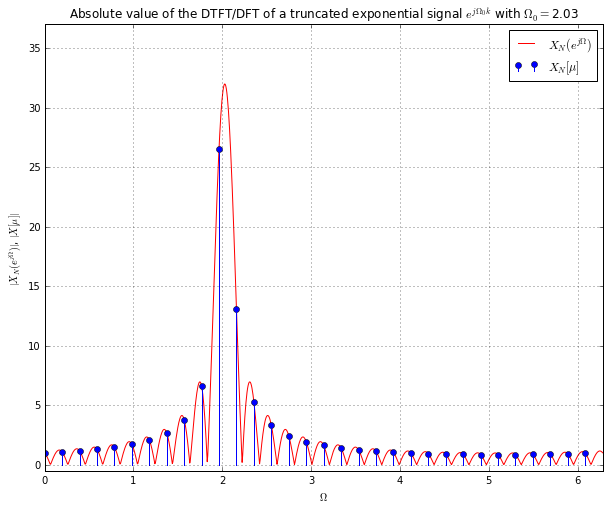

In [2]:
N = 32  # length of the signal
P = 10.33  # periodicity of the exponential signal
Om0 = P * (2*np.pi/N)  # frequency of exponential signal


# truncated exponential signal
x = np.exp(1j*Om0*np.arange(N))

# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
plt.hold(True)

plt.plot(Om, abs(Xw), 'r', label=r'$X_N(e^{j \Omega})$')
plt.stem(mu, abs(X), label=r'$X_N[\mu]$', basefmt=' ')
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X_N(e^{j \Omega})|$, $|X[\mu]|$')
plt.axis([0, 2*np.pi, -0.5, N+5]);
plt.legend()
plt.grid()

plt.show()

**Exercise**

* Change the periodicity `P` of the exponential signal and rerun the example. What happens if the periodicity is an integer? Why?
* Change the length `N` of the DFT? How does the spectrum change?
* What conclusions can be drawn for the analysis of a single exponential signal by the DFT?

You should have noticed that for an exponential signal whose periodicity is an integer $P \in \mathbb{N}$, the DFT consists of a discrete Dirac pulse $X[\mu] = \delta[\mu - P]$. In this case, the sampling points coincide with the maximum of the main lobe or the zeros of the DTFT. For non-integer $P$, hence non-periodic exponential signals with respect to the signal length $N$, the DFT has additional contributions. The shorter the length $N$, the wider these contributions are spread in the spectrum. This smearing effect is known as *leakage effect* of the DFT. It limits the achievable frequency resolution of the DFT when analyzing signal mixtures consisting of more than one exponential signal. This is illustrated by the following numerical examples.

### Analysis of Signal Mixtures by the Discrete Fourier Transformation

In order to discuss the implications of the leakage effect when analyzing signal mixtures, the superposition of two exponential signals with different amplitudes and frequencies is considered

\begin{equation}
x_N[k] = A_1 \cdot e^{\mathrm{j} \Omega_1 k} + A_2 \cdot e^{\mathrm{j} \Omega_2 k}
\end{equation}

For convenience, a function is defined that calculates and plots the magnitude spectrum of $x_N[k]$.

In [3]:
def dft_signal_mixture(N, A1, P1, A2, P2):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    
    # generate the signal mixture
    Om0_1 = P1 * (2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2 * (2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt=' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, N+5]);
    plt.grid()

Lets first consider the case that the frequencies of the two exponentials are rather far apart

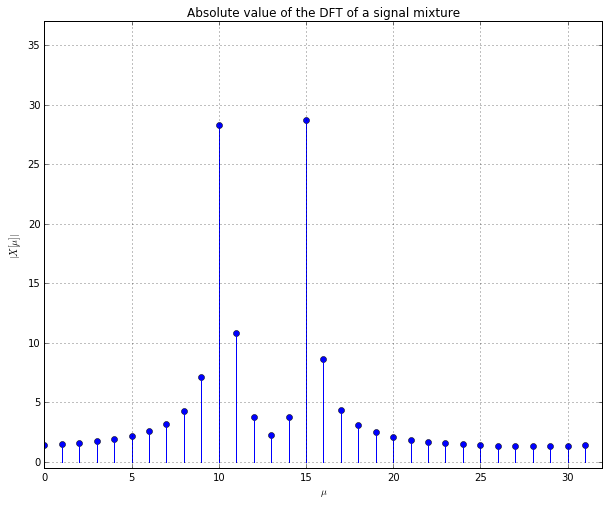

In [4]:
dft_signal_mixture(32, 1, 10.3, 1, 15.2)

Investigating the magnitude spectrum one could conclude that the signal consists of two major contributions at the frequencies $\mu_1 = 10$ and $\mu_2 = 15$. Now lets take a look at a situation where the frequencies are closer together

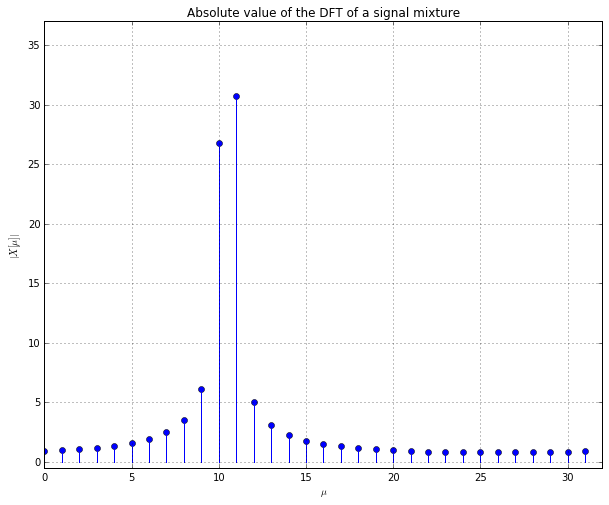

In [5]:
dft_signal_mixture(32, 1, 10.3, 1, 10.9)

From visual inspection of the spectrum it is rather unclear if the mixture consists of one or two exponential signals. So far the levels of both signals where chosen equal. 

Lets consider the case where the second signal has a much lower level that the first one. The frequencies have been chosen equal to the first example

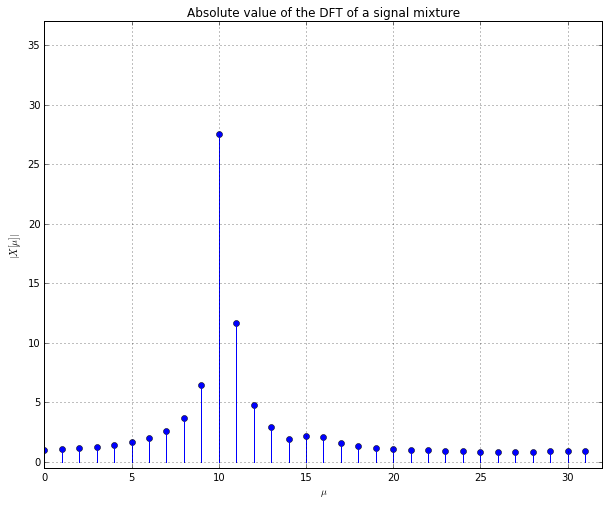

In [6]:
dft_signal_mixture(32, 1, 10.3, 0.1, 15.2)

Now the contribution of the second exponential is almost hidden in the spread spectrum of the first exponential. From these examples it should have become clear that the leakage effect limits the spectral resolution of the DFT.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.